In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%time

X_train = pd.read_csv("./Dataset/train.csv")
X_test = pd.read_csv("./Dataset/example_test.csv")

CPU times: user 16.7 s, sys: 1.71 s, total: 18.4 s
Wall time: 19.2 s


In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236806 entries, 0 to 24236805
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  int64  
 1   Asset_ID   int64  
 2   Count      float64
 3   Open       float64
 4   High       float64
 5   Low        float64
 6   Close      float64
 7   Volume     float64
 8   VWAP       float64
 9   Target     float64
dtypes: float64(8), int64(2)
memory usage: 1.8 GB


In [3]:
# Check for missing values
X_train.isnull()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
24236801,False,False,False,False,False,False,False,False,False,True
24236802,False,False,False,False,False,False,False,False,False,True
24236803,False,False,False,False,False,False,False,False,False,True
24236804,False,False,False,False,False,False,False,False,False,True


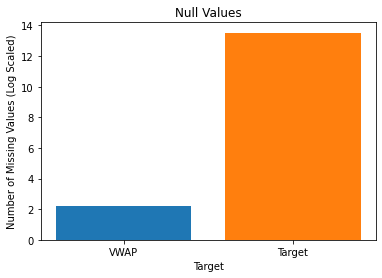

Features with null values:  ['VWAP', 'Target']


In [21]:
null_values_features = []

for column in X_train.columns:
    count = (X_train[column].isnull().sum())
    if(count != 0):
        plt.bar(column, np.log(count))
        null_values_features.append(column)
    plt.xlabel(column)
    plt.ylabel("Number of Missing Values (Log Scaled)")
plt.title("Null Values")
plt.show()

# Print columns having null values
print("Features with null values: ", null_values_features)

In [ ]:
# Impute null values with median so that outliers dont matter
for column in null_values_features:
    median = np.median()
    X_train[column].fillna()